<b>Check and analyze validation (Prediction) data's augmentation types</b>

In this code we will create multiple filters to get an estimate on the kind of augmentations used on the validation dataset. eg: crops, horizontal-shift, vertical-shift etc...

In [7]:
############# Check and analyse validation data augmentation density

import numpy as np
import matplotlib.pyplot as plt
from numpy import load
print("Libraries Loaded")

Libraries Loaded


In [8]:
# load dict of arrays

dict_Validation = load('../input/processed-total-dataset/Processed_Val.npz')
Val = dict_Validation['arr_0']
print("Validation Dataset's Dimensions:" ,Val.shape)

Validation Dataset's Dimensions: (48238, 8, 8, 3)


**Plot a sample validation image**

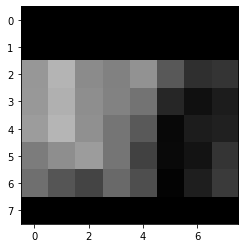

In [9]:
plt.figure(1);
plt.clf()
plt.imshow(Val[11], cmap='gray')
plt.pause(0.5)


**Function to fetch rows and columns of an image pixels**

In [10]:
#Row fetch    x2=x1[ith image][nth row to check 0-7]

#Column fetch    x2=x1[ith image][:,nth column to check 0-7]

def fetch_RC(img):
    R0 = np.sum(img[0])
    R1 = np.sum(img[1])
    R2 = np.sum(img[2])
    R3 = np.sum(img[3])
    R4 = np.sum(img[4])
    R5 = np.sum(img[5])
    R6 = np.sum(img[6])
    R7 = np.sum(img[7])

    C0 = np.sum(img[:,0])
    C1 = np.sum(img[:,1])
    C2 = np.sum(img[:,2])
    C3 = np.sum(img[:,3])
    C4 = np.sum(img[:,4])
    C5 = np.sum(img[:,5])
    C6 = np.sum(img[:,6])
    C7 = np.sum(img[:,7])
    
    return R0,R1,R2,R3,R4,R5,R6,R7,C0,C1,C2,C3,C4,C5,C6,C7

#R0,R1,R2,R3,R4,R5,R6,R7,C0,C1,C2,C3,C4,C5,C6,C7 = fetch_RC(Val[8])

***LOOP ENTIRE DATA To find out Augmentation Density of Validation Data***

In [11]:

h_shift_0x1 = 0

h_shift_1x0 = 0

h_crop_2x3 = 0
h_crop_3x2 = 0
h_crop_2x2 = 0

h_crop_1x2 = 0

h_crop_2x1 = 0
h_crop_1x1 = 0

v_shift_1x0 = 0

v_crop_3x2 = 0
v_crop_2x2 = 0

v_crop_2x1 = 0
v_crop_1x1 = 0
FULL = 0


for i in range(len(Val)):
    R0,R1,R2,R3,R4,R5,R6,R7,C0,C1,C2,C3,C4,C5,C6,C7 = fetch_RC(Val[i])

    if(R0==0 or R7==0):
        ### H SHIFTERS

        if (R0!=0) and R7==0:
            #print("h_shift_0x1")
            h_shift_0x1+=1


        elif (R7!=0) and R0==0:
            #print("h_shift_1x0")
            h_shift_1x0+=1

        ### H CROPPERS

        elif R0==R1==0 and R5==R6==R7==0:
            #print("h_crop_2x3")
            h_crop_2x3+=1

        elif R0==R1==R2==0 and R6==R7==0:
            #print("h_crop_3x2")
            h_crop_3x2+=1
        elif R0==R1==0 and R6==R7==0:
            #print("h_crop_2x2")
            h_crop_2x2+=1

        elif R0==0 and R6==R7==0:
            #print("h_crop_1x2")
            h_crop_1x2+=1

        elif R0==R1==0 and R7==0:
            #print("h_crop_2x1")
            h_crop_2x1+=1

        elif R0==0 and R7==0:
            #print("h_crop_1x1")
            h_crop_1x1+=1

    elif(C0==0 or C7==0):        
        ### V SHIFTERS
        if (C7!=0) and C0==0:
            #print("v_shift_1x0")
            v_shift_1x0+=1

        ### V CROPPERS

        elif C0==C1==C2==0 and C6==C7==0:
            #print("v_crop_3x2")
            v_crop_3x2+=1
        elif C0==C1==0 and C6==C7==0:
            #print("v_crop_2x2")
            v_crop_2x2+=1

        elif C0==0 and C4==C5==C6==C7==0:
            #print("v_crop_1x4")
            v_crop_1x4+=1

        elif C0==C1==0 and C7==0:
            #print("v_crop_2x1")
            v_crop_2x1+=1

        elif C0==0 and C7==0:
            #print("v_crop_1x1")
            v_crop_1x1+=1

    else:
        #print("Full Image")
        FULL+=1

**Print Results**

In [12]:
print("h_shift_0x1: ",h_shift_0x1)

print("h_shift_1x0: ",h_shift_1x0)

print("h_crop_2x3: ",h_crop_2x3)
print("h_crop_3x2: ",h_crop_3x2)
print("h_crop_2x2: ",h_crop_2x2)

print("h_crop_1x2: ",h_crop_1x2)

print("h_crop_2x1: ",h_crop_2x1)
print("h_crop_1x1: ",h_crop_1x1)


print("v_shift_1x0: ",v_shift_1x0)

print("v_crop_3x2: ",v_crop_3x2)
print("v_crop_2x2: ",v_crop_2x2)

print("v_crop_2x1: ",v_crop_2x1)
print("v_crop_1x1: ",v_crop_1x1)
print("Full sized images: ",FULL)

h_shift_0x1:  12
h_shift_1x0:  2824
h_crop_2x3:  15
h_crop_3x2:  58
h_crop_2x2:  304
h_crop_1x2:  12
h_crop_2x1:  6666
h_crop_1x1:  22516
v_shift_1x0:  1730
v_crop_3x2:  24
v_crop_2x2:  102
v_crop_2x1:  2535
v_crop_1x1:  7583
Full sized images:  3855
